<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/ProyectoML/AlgoritmoEvolutivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [97]:
def Plotter(e):

  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(221)
  ax1 = fig.add_subplot(222)
  ax2 = fig.add_subplot(223)
  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return ax,ax1,ax2

In [137]:
class Robot:

    # Definamos el constructor de clase
    def __init__(self, f, rate, Id = 0):

      # Inicializar atributos
      self.Id = Id
      self.f = f
      self.rate = rate

      # Necesitamos ubicar al robot
      self.r = np.random.uniform(-10,10, size=1)
      # Calcular el Fitness original
      self.Fitness = self.f(self.r)

    # Metodo de clase
    def Mutate(self):
      self.r += np.random.normal(loc=0,scale=self.rate)

    # Setter de clase
    def SetFitness(self):
      self.Fitness = self.f(self.r)

    # Getter de clase
    def GetFitness(self):
      return self.Fitness

    def __repr__(self):
      return f"Robot {self.Id}"

In [138]:
f = lambda x: x**2 + 10*np.sin(x)

In [139]:
rate = 0.2

In [140]:
def GetRobots(N=10):

  Robots = []
  for i in range(N):
    r = Robot(f,rate,Id=i)
    Robots.append(r)

  return Robots

In [141]:
Robots = GetRobots(20)

In [158]:
def Genetic(Robots, epochs=100, Plot=True):

  #t = np.linspace(-5,5,50)

  VVar = np.array([])

  for e in range(epochs):

    clear_output(wait=True)

    # Zona de Cambiar
    for i, p in enumerate(Robots):
      p.Mutate()
      p.SetFitness()

    # Zona de Ordenar


    # Extraemos la aptitud
    Fitness = np.array([ p.GetFitness() for i, p in enumerate(Robots) ])
    Var = np.array( [ (i - np.mean(Fitness))**2 for i in Fitness ] )
    VVar = np.append(VVar,np.sum(Var))
    #print(Fitness)
    #print(np.mean(Fitness))
    #print(np.sum(Var))

    # Zona de pintar
    if Plot:
      ax,ax1,ax2 = Plotter(e)
      for i, p in enumerate(Robots):
        ax.scatter(p.r,Robots[i].f(p.r),color='r')
        ax1.plot(Fitness,'.-',color='k')
        ax1.axhline(y=np.mean(Fitness),color='r')
        ax2.plot(VVar,'.-',color='k')

    plt.show()
    time.sleep(0.001)

  return Robots

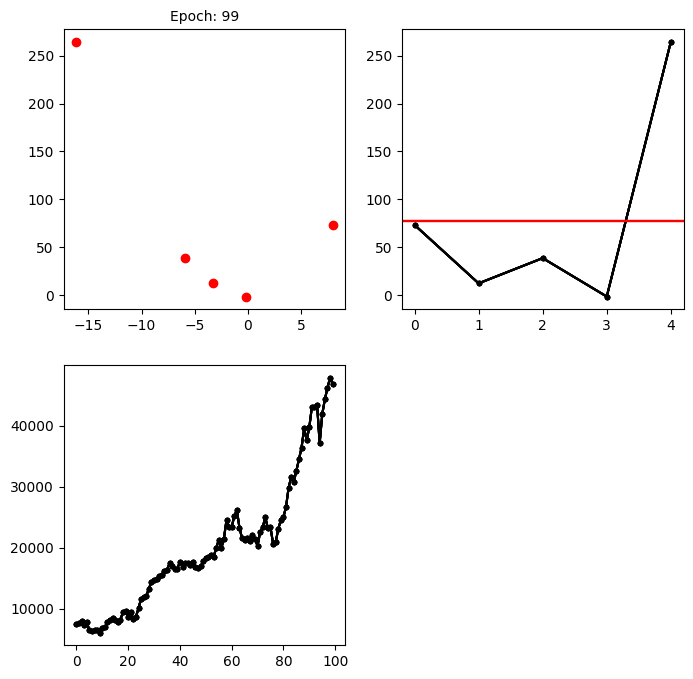

In [159]:
Robots = GetRobots(5)
Robots = Genetic(Robots, Plot=True)